# Exploratory Data Analysis & Intro

## Goal

1. Investigate top-paying roles and skills in the data science industry.
2. Use Python to explore a real-life dataset on job postings.
3. For job-seekers: use these insights to help find the best job opportunities.

## Final Deliverables:

- Create Jupyter Notebooks (showcasing core skills in Python)
- Create a summary page (via README.md) captivating your findings.
- Share this project via GitHub & LinkedIn.

## Roles to Explore

### Importing Libraries and Data

In [11]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

### Filter for Hungarian Data Analyst roles

In [31]:
country = 'United States'

In [32]:
df_DA = df[(df['job_country'] == country) & (df['job_title_short'] == 'Data Analyst')]

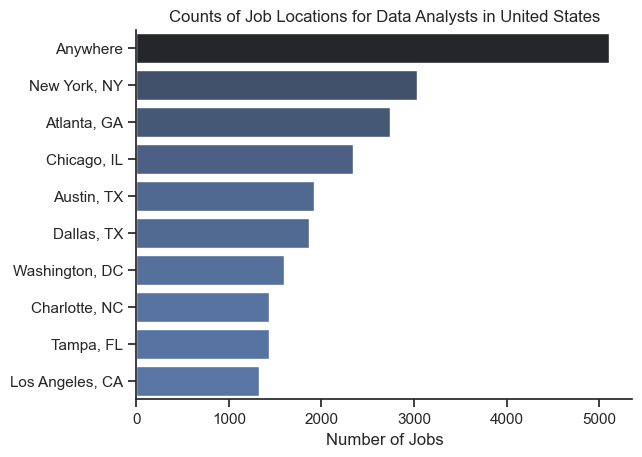

In [33]:
df_plot = df_DA['job_location'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title(f'Counts of Job Locations for Data Analysts in {country}')
plt.xlabel('Number of Jobs')
plt.ylabel('')

plt.show()

### Job Opportunities

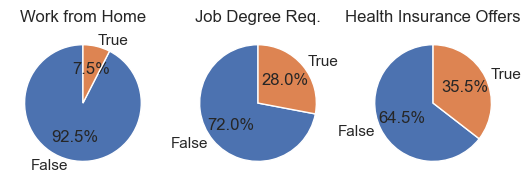

In [34]:
fig, ax = plt.subplots(1, 3)

dict_column = {
    'job_work_from_home': 'Work from Home',
    'job_no_degree_mention': 'Job Degree Req.',
    'job_health_insurance': 'Health Insurance Offers'
}

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_DA[column].value_counts(), startangle=90, autopct='%1.1f%%', labels=['False', 'True'])
    ax[i].set_title(title)

plt.show()

### Companies to Explore

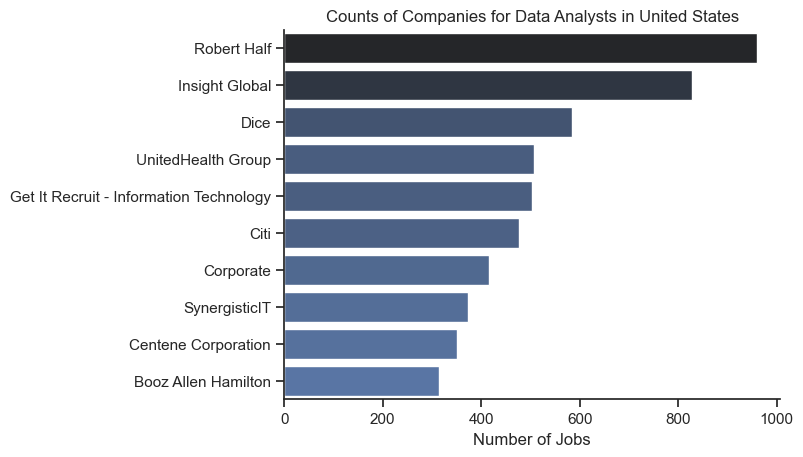

In [35]:
df_plot = df_DA['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title(f'Counts of Companies for Data Analysts in {country}')
plt.xlabel('Number of Jobs')
plt.ylabel('')

plt.show()